# UNIT 9. Convolutional Neural Networks on the MNIST dataset

This Unit includes an implementation of a CNN to calssify digits from the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Code adapted from 

```{bibliography}
:style: unsrt
```

we start by importing:
* the dataset *MNIST*
* the **[Sequential](https://keras.io/guides/sequential_model/)** function
* the differential layers:
  * **[Conv2D](https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148)**: creates the convolutional kernel to produce a set of output features
  * **[MaxPooling2D](https://deepai.org/machine-learning-glossary-and-terms/max-pooling)**: downsamples the input by taking the maximum value of the kernel, reducing the dimensionality of the model
  * **Flatten**: flattens the input tensor into a one dimensional vector. Useful when transitioning from a CNN to a fully connected CNN
  * **Dense**: standard fully connected NN layer. Each neuron in the layer is connected to all neurons in the previous layer. 
* **to_categorical**

In [170]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt



let us now load the MNIST dataset

In [171]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Let us display a collection of sample images

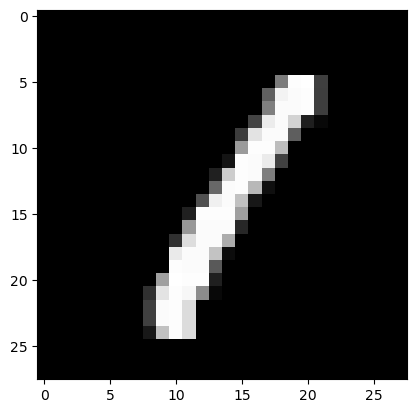

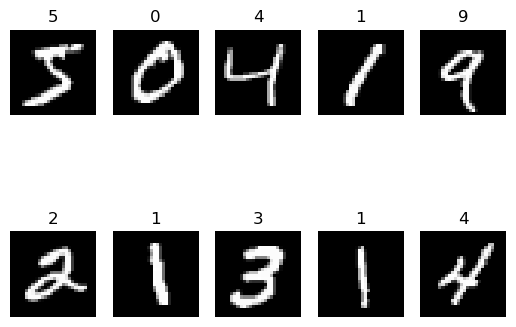

In [172]:

plt.imshow(X_train[3],cmap='gray')
plt.show()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Data preprocessing

### Feature Engineering

* Normalization


In [173]:
print('pre-normalization data:',X_train[0])
X_train = X_train.astype('float32')/255
X_text = X_test.astype('float32')/255
print('post-normalization data:',X_train[0])

pre-normalization data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

* Reshape the dataset to be 4D
  * `batch_size`: the number of training examples processed
  * `height`/`width`: height/width of each input image in pixels
  * `channels`: number of color channels


In [174]:

X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

* [One hot encoding](https://blog.gopenai.com/one-hot-encoding-for-ml-with-tensorflow-and-keras-50f67ca9681a) using the `to_categorial` function. It converts the data into an integer. In this particular case, the best choice for this dataset would be to apply *sparse categorical crossentropy loss*— for the simple reason that we don’t have to apply one-hot encoding if we use that loss function. However, for the sake of training, we will apply here one hot encoding to use *categorical crossentropy loss*.

In [175]:
print(y_test.shape)
print(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test.shape)
print(y_test)

(10000,)
[7 2 1 ... 4 5 6]
(10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Build a CNN model

### Define the model architecture

* 4 layers (2 [convolutional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and 2 Maxpooling)
* 1 flattening layer
* 1 fully connected layer

In [176]:
model = Sequential()
# first layer with 32 filters and a filter size of (3,3)
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
# we reduce the size to half with the MaxPooling layer
model.add(MaxPooling2D((2,2)))
# the third layer uses 64 filters
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
# convert the 2D map to a 1D vector
model.add(Flatten())
# fully connected layer with 10 output units, as the categories we have. Linear transformation followed by a softmax to finally select one category
model.add(Dense(10,activation='softmax'))

Compile the model. We will use the Adam optimizer (Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.)

In [177]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [178]:
plot_model(model,'model.jpg',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


let us have a look at the different kernels

In [179]:
print(model.layers[0].kernel)
print(model.layers[2].kernel)


<tf.Variable 'conv2d_12/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.0717376 ,  0.12769519,  0.08789454,  0.05253138,
          -0.11401037, -0.13674393,  0.14176215, -0.03162821,
           0.08083284, -0.11815737, -0.09512089,  0.11325438,
          -0.05740895,  0.02741964, -0.03588605,  0.05777355,
          -0.01218839, -0.06179042,  0.1334251 , -0.09000895,
          -0.09403009,  0.10086344,  0.06635694, -0.0880443 ,
           0.13914786,  0.0108107 ,  0.03892626,  0.12062512,
          -0.01364759,  0.00382094, -0.04765872, -0.1113653 ]],

        [[-0.04247792, -0.01092371,  0.09028479,  0.10562329,
          -0.02947589, -0.12216106,  0.11181484, -0.03891839,
          -0.06762463,  0.05609684, -0.03396688, -0.13659653,
           0.08405785,  0.02790622, -0.03921193, -0.00926368,
           0.05148487, -0.03984149,  0.13498177, -0.13713032,
          -0.07542631, -0.00471647, -0.12538266,  0.11634909,
          -0.11422603,  0.02180572,  0.10012202, -0.0

## Train the model

* batch_size:
* epochs: number of iterations

In [180]:
model.fit(X_train,y_train,batch_size=128, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10


469/469 [==============================] - 58s 122ms/step - loss: 0.2712 - accuracy: 0.9255 - val_loss: 10.0669 - val_accuracy: 0.9777
Epoch 2/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0732 - accuracy: 0.9780 - val_loss: 5.4060 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0537 - accuracy: 0.9840 - val_loss: 7.1290 - val_accuracy: 0.9826
Epoch 4/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 5.9989 - val_accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 6.8260 - val_accuracy: 0.9876
Epoch 6/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 7.4118 - val_accuracy: 0.9867
Epoch 7/10
469/469 [==============================] - 44s 93ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 5.9236 - val_accuracy: 0.988

## Model accuracy



In [181]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print('Test accuracy:',test_acc)
print('Test loss:',test_loss)

313/313 - 2s - loss: 9.1546 - accuracy: 0.9868 - 2s/epoch - 6ms/step
Test accuracy: 0.9868000149726868
Test loss: 9.15458869934082


In [182]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step
